In [5]:
import yaml
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from extract import HIPTFeatureExtractor
from heatmap import extract_attention
from scipy.ndimage import zoom
from tqdm.notebook import tqdm

with open('config.yaml', 'r') as f:
    config = yaml.safe_load(f)

sub_dir = 'metastasis/isala'

slide_path = sorted(list((Path(config['slide_dir']) / sub_dir).iterdir()))[4]
patches_path = Path(config['preprocess_dir']) / sub_dir / 'patches' / (slide_path.stem + '.h5')

fe = HIPTFeatureExtractor(slide_path, patches_path)
fe.setup()

level = 5
attention_heatmap = np.zeros([6] + np.flip(fe.slide.level_dimensions[level]).tolist())


for ix in tqdm(list(range(len(fe.dataset)))):
    x = fe.dataset[ix]
    break  
    _, attention_4k = extract_attention(fe, x)

    zoomed_attention = zoom(attention_4k, zoom=[1, 2**(1-level), 2**(1-level)])
    y,x = (fe.patch_coordinates[ix] / 2**level).astype(int)
    zoomed_dim = zoomed_attention.shape[1]

    patch = attention_heatmap[:, x:x+zoomed_dim, y:y+zoomed_dim]
    attention_heatmap[:, x:x+zoomed_dim, y:y+zoomed_dim] = zoomed_attention[:, :patch.shape[1], :patch.shape[2]]

attention_heatmap[np.where(attention_heatmap == 0)] = float('nan')


# of Patches: 196


  0%|          | 0/6 [00:00<?, ?it/s]

In [2]:
from PIL import Image

img = np.array(Image.open('/home/rens/repos/premium_pathology/hipt_feature_extractor/examples/image_4k.png'))

In [7]:
from heatmap import transform_image

transform_image(img).shape

torch.Size([2, 4096, 4096])

In [6]:
x.shape

torch.Size([3, 4096, 4096])

In [8]:
from torchvision import transforms
from heatmap import extract_attention

transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize(mean=0.5, std=0.5),
    ]
)

x = transform(img)

attention_256, attention_4k = extract_attention(fe, x)

In [ ]:
for head in range(6):
    fig, ax = plt.subplots(1,3, figsize=(24,24))
    ax[0].imshow(img)
    ax[1].imshow(img)
    ax[1].imshow(attention_256[head], cmap='seismic', alpha=0.3)
    ax[2].imshow(attention_256[head], cmap='seismic')
    plt.show()

In [ ]:
dim = fe.slide.level_dimensions[level]
img = fe.slide.read_region((0,0), level, dim)

for head in range(6):
    fig, ax = plt.subplots(1,3, figsize=(24,24))
    ax[0].imshow(img)
    ax[1].imshow(img)
    ax[1].imshow(attention_heatmap[head], cmap='seismic', alpha=0.3)
    ax[2].imshow(attention_heatmap[head], cmap='seismic')
    plt.show()


In [ ]:
size = 1024
w, h = 500, 1500

for head in range(6):
    heatmap = rearrange(attention_256[:,head], '(b1 b2) h w -> (b1 h) (b2 w)', b1=16)
    fig, ax = plt.subplots(1,3, figsize=(30,20))
    ax[0].imshow(img[h:h+size, w:w+size])
    ax[1].imshow(img[h:h+size, w:w+size])
    ax[1].imshow(heatmap[h:h+size, w:w+size], cmap='seismic', alpha=0.4)
    ax[2].imshow(heatmap[h:h+size, w:w+size], cmap='seismic')
    fig.show()


In [ ]:
for ix in tqdm(list(range(len(fe.dataset)))):

    x = fe.dataset[ix]
    
    _, attention_4k = extract_attention(x)

    zoomed_attention = zoom(attention_4k, zoom=[1, 2**(1-level), 2**(1-level)])
    y,x = (fe.patch_coordinates[ix] / 2**level).astype(int)
    zoomed_dim = zoomed_attention.shape[1]

    patch = attention_heatmap[:, x:x+zoomed_dim, y:y+zoomed_dim]
    attention_heatmap[:, x:x+zoomed_dim, y:y+zoomed_dim] = zoomed_attention[:, :patch.shape[1], :patch.shape[2]]

attention_heatmap[np.where(attention_heatmap == 0)] = float('nan')
plt.imshow(attention_heatmap[0], cmap='seismic')
plt.show()

In [138]:
with open(f'/home/rens/repos/premium_pathology/hipt_feature_extractor/heatmap_examples/{slide_path.stem}', 'wb') as f:
    np.save(f, attention_heatmap)


In [ ]:
for head in range(6):
    fig, ax = plt.subplots(1,3, figsize=(24,24))
    ax[0].imshow(img)
    ax[1].imshow(img)
    ax[1].imshow(attention_heatmap[head], cmap='seismic', alpha=0.3)
    ax[2].imshow(attention_heatmap[head], cmap='seismic')
    plt.show()


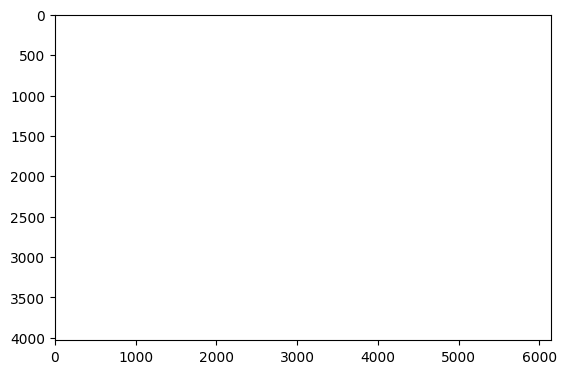

In [64]:
plt.imshow(attention_heatmap[1], cmap='seismic')
plt.show()

In [ ]:
x = fe.dataset[ix]

plt.imshow(x.numpy().transpose((1,2,0)))
plt.show()

In [52]:
x.shape

torch.Size([3, 4096, 4096])

In [ ]:
fe.slide.read_region(fe.patch_coordinates[7], 1, (4096, 4096))

In [ ]:
for head in range(1):
    fig, ax = plt.subplots(1,3, figsize=(18,6))
    ax[0].imshow(x[0].numpy().transpose(1,2,0))
    ax[1].imshow(x[0].numpy().transpose(1,2,0))
    ax[1].imshow(attention_4k[head], cmap='seismic', alpha=0.3)
    ax[2].imshow(attention_4k[head], cmap='seismic')
    plt.show()

In [ ]:
head = 4

size = 512
w = 3500
h = 3000

for head in range(6):
    patch = rearrange(batch_256.cpu().numpy(), '(b1 b2) c h w -> (b1 h) (b2 w) c', b1=16)
    heatmap = rearrange(attention_256[:,head], '(b1 b2) h w -> (b1 h) (b2 w)', b1=16)

    fig, ax = plt.subplots(1,3, figsize=(18,6))
    ax[0].imshow(patch[w:w+size, h:h+size])
    ax[1].imshow(patch[w:w+size, h:h+size])
    ax[1].imshow(heatmap[w:w+size, h:h+size], cmap='seismic', alpha=0.4)
    ax[2].imshow(heatmap[w:w+size, h:h+size], cmap='seismic')
    fig.show()